### __BUSA3020 Group Assignment - Predicting Airbnb Listing Prices in Sydney__

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19](https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    
Total Marks: 11


**Forecasting Problem:**
The forecasting problem involves predicting daily Airbnb housing prices in the Sydney area by using 10000 web-scraped samples, where 7000 are training data points and 3000 are testing data points. The dataset will require data-cleaning measures like imputing missing values and featuring engineering to ensure necessary variables can be used within the machine learning algorithm to create predictions forecasts with minimal errors. With this in mind, regression models will be used to model and predict the out-of-sample data, with various additional hyper tuning parameters like grid-search to enhance the model’s performance. Ultimately, having an effective model that accurately predicts out-of-sample data may help customers determine whether an Airbnb host is overcharging their prices. Conversely, it enables property hosts to gain a clearer picture of the market value of their property and in turn, create a suitable but competitive daily price.

**Evaluation Criteria:**
Due to the nature of this competition, where we do not know the Airbnb listing prices for the testing data, we are unable to gain an accurate representation of the accuracy of our model. Therefore, the best evaluation metric is to use the Mean Squared Error (MSE) as Kaggle measures the average difference between the predicted and actual values. A high mean squared error implies that the model is incorrectly predicting the prices by a larger amount, whilst a lower mean squared error states that the predictions are closer to the actual values. Ultimately, we cannot gain the real MSE or R squared of the test dataset, but only the training dataset.

**Types of Variables/Features:**
price: price for one night; numeric data
id (discrete)
name (string)
description (string)
Neighbourhood_overview (string)
host_name (string)
host_since (datetime)
Host_location (String)
Host_about (string)
host_response_time
host_acceptance_rate
host_is_superhost
host_neigbourhood
host_listing_count
host_verifications
host_has_profile_pic (boolean)
host_identity_verified
neighbourhood (categorical)
neighbourhood_cleansed: The name of neighbourhood; text data
latitude and longitude: The geographical information; numeric data
property_type (Categorical)
room_type: Type of room (Entire home/apt, Private room and Shared room); categorical data
accomodates (int)
bathrooms (string)
bedrooms (int)
beds (int)
amenities: What amenities they provide; text data
Nights (includes all minimum, maxiumum, average) (float)
has_availability  (boolean)
availability_30,60,90 (int)
availability_365 (float)
number_of_reviews (int)
first/last_review (date)
review_scores (several different types) (float)
license (string)
instant_bookable (boolean)
Calculated_host_listings (int)
reviews_per_month (float). Various datatypes included are floats, integers, strings, dates and booleans.

**Data Summary and main characteristics:**
The dataset consists of 7000 training and 3000 testing listings from various AirBnBs in Sydney. There are 60 columns in the training dataset, with price excluded in the testing dataset as the response variable, making it 59 columns. Looking at the data, some common groupings include host-related information, property details, customer reviews and locations. Dummy variables are created to account for categorical features, such as columns being host_verifications and amenities. These columns contain a plethora of string values, that cannot be used for regression due to them not being identifiable by the model. The data may be subject to change during the data cleaning process.

**Missing Values:**
Missing values exist across most columns, with a large number present in categorical columns. As for the numerical columns, imputations are made relatively simple using fillna statistics like mean, median and modes. Looking at some other unique columns, first/last review columns contain missing date values, whilst license includes many rows of unique values, making it difficult to accurately impute.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 11

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [1]:
#Importing libraries 
from scipy import stats
from scipy.stats import norm, skew 
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline


#Ignore any warning messages, for convenience
import warnings
warnings.filterwarnings('ignore')


#Importing Training and Testing Data
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#Keeping a spare copy of the raw dataframe
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

In [2]:
# Removing '$' from price column and converting it from a currency format to a integer. This way, it can be used in the model as our predictor.
df_train["price"] = df_train["price"].str.replace(',', '')
df_train["price"] = df_train["price"].str.replace('$', '')
y_train = df_train['price'].str.replace(',', '')
y_train = df_train['price'].str.replace('$', '')
y_train = df_train['price']


# Removing all bath related characters to ensure only the value remains being the number of bathrooms the property has.
df_train.loc[df_train['bathrooms'] == 'Shared half-bath', 'bathrooms'] = '0.5'
df_train.loc[df_train['bathrooms'] == 'Half-bath', 'bathrooms'] = '0.5'
df_train.loc[df_train['bathrooms'] == 'Private half-bath','bathrooms'] = '0.5'

df_train["bathrooms"] = df_train["bathrooms"].str.replace('baths', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('bath', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('private', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('shared', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('half-', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('half', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('Shared', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('Half-', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace('Private', '')
df_train["bathrooms"] = df_train["bathrooms"].str.replace(' ', '')

# Useable raw data (price is clean)
df_train_raw_cleanprice = df_train
df_test_raw_cleanprice = df_train

# Converting host_response_rate and host_acceptance_rate from a % (string) to decimal form.
df_train['host_response_rate'] = df_train['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [3]:
#Transforming Host acceptance rate and Host response rate from percentage to decimal
df_test['host_response_rate'] = df_test['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# Renaming all 'half baths' to '0.5' for data type consistency
df_test.loc[df_test['bathrooms'] == 'Shared half-bath', 'bathrooms'] = '0.5'
df_test.loc[df_test['bathrooms'] == 'Half-bath', 'bathrooms'] = '0.5'
df_test.loc[df_test['bathrooms'] == 'Private half-bath', 'bathrooms'] = '0.5'

# Removing all bath related characters to ensure only numerical values reamin 
df_test["bathrooms"] = df_test["bathrooms"].str.replace('baths', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('bath', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('private', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('shared', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('half-', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('half', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('Shared', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('Half-', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace('Private', '')
df_test["bathrooms"] = df_test["bathrooms"].str.replace(' ', '')

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `reviews`, `jumio`, etc. from feature `host_verifications`.  
(2 marks)

In [4]:
# Cleaning of amenities to ensure it can be directly used in a bar chart to show the number of each amenities

results = Counter()
df_train['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
print('')

In [5]:
# Cleaning of host_verification to ensure it can be directly used in a bar chart to show the number of each ahost_verification

results1 = Counter()
df_train['host_verifications'].str.strip('[]')\
               .str.replace("'", '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results1.update)
print('')

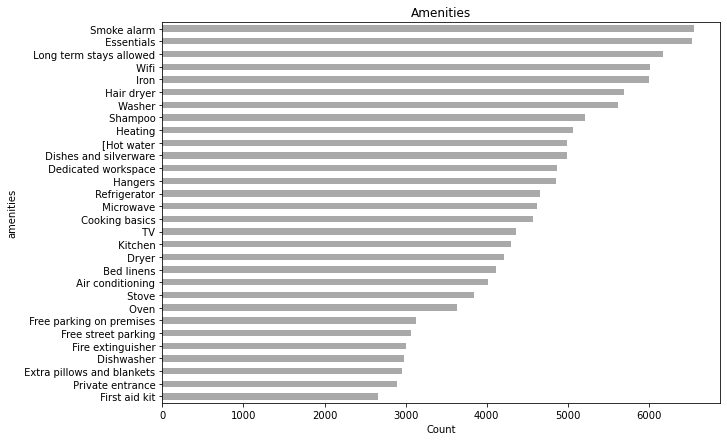

In [6]:
# Preliminary bar graph of most common amenities to be used in later data cleaning. Evident that smoke alarm, essentials, long term stays allowed, wifi and Iron are most common

Amen_df = pd.DataFrame(results.most_common(30), columns=['amenities', 'count'])
Amen_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenities', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

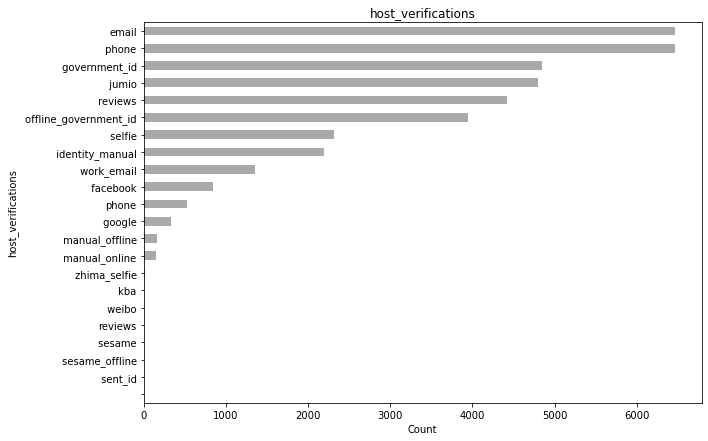

In [7]:
# Preliminary bar graph of most common host_verifications to be used in later data cleaning. Evident that email, phone, government_id, jumio and reviews are most common

host_ver_df = pd.DataFrame(results1 .most_common(30), columns=['host_verifications', 'count'])
host_ver_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='host_verifications', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='host_verifications')
plt.xlabel('Count');

In [8]:
#Training dataset
#Removing the square brackets and quotation marks for ammenities for data cleanliness 

df_train.host_verifications = df_train.host_verifications.apply(lambda x :x.strip('[').strip(']'))
df_train.host_verifications = df_train.host_verifications.apply(lambda x:x.replace("'",''))

df_train.amenities = df_train.amenities.apply(lambda x :x.strip('[').strip(']'))
df_train.amenities = df_train.amenities.apply(lambda x:x.replace('"',''))


#Testing dataset
#Removing the square brackets and quotation marks for ammenities for data cleanliness 

df_test.host_verifications = df_train.host_verifications.apply(lambda x :x.strip('[').strip(']'))
df_test.host_verifications = df_train.host_verifications.apply(lambda x:x.replace("'",''))

df_test.amenities = df_test.amenities.apply(lambda x :x.strip('[').strip(']'))
df_test.amenities = df_test.amenities.apply(lambda x:x.replace('"',''))

In [9]:
# Creating a count of how many ammenities and host_verifications are in each row. Specifically, counting the frequency of commas + 1 as there will be one more amenity after the last column.

df_train['amenities_count'] = df_train.amenities.str.count(',').add(1)    
df_test['amenities_count'] = df_test.amenities.str.count(',').add(1)

df_train['host_verifications_count'] = df_train.host_verifications.str.count(',').add(1)    
df_test['host_verifications_count'] = df_test.host_verifications.str.count(',').add(1)

In [10]:
# Creating a copy of the dataframe before dummy variables are created - Checking whether the string has specific amenities and creating dummy-variable like columns. This will only occur in this dataframe for the sake of the question.
# We believe that other columns that are not in top 5 do have a strong impact on the model predictions. When we are building the model in Task 3, we will use the dataframe that contains all amenities and verifications
df_train_amen_host = df_train.copy()
df_test_amen_host = df_train.copy()

# If a column contains the most common ammenity in our graph above, it will be allocated "True" or otherwise "False"
# Training
df_train_amen_host['Smoke alarm'] = df_train_amen_host['amenities'].str.contains('Smoke alarm')
df_train_amen_host['TV'] = df_train_amen_host['amenities'].str.contains('TV')
df_train_amen_host['Essentials'] = df_train_amen_host['amenities'].str.contains('Essentials')
df_train_amen_host['Long term stays allowed'] = df_train_amen_host['amenities'].str.contains('Long term stays allowed')

# Renaming True to 1, and False to 0 by converting it to an integer.
df_train_amen_host['Smoke alarm'] = df_train_amen_host['Smoke alarm'].astype(int)
df_train_amen_host['TV'] = df_train_amen_host['TV'].astype(int)
df_train_amen_host['Essentials']= df_train_amen_host['Essentials'].astype(int)
df_train_amen_host['Long term stays allowed'] = df_train_amen_host['Long term stays allowed'].astype(int)
df_train_amen_host.drop(['amenities'], axis=1, inplace=True)

# If a column contains the most common ammenity in our graph above, it will be allocated "True" or otherwise "False"
#Testing
df_test_amen_host['Smoke alarm'] = df_test_amen_host['amenities'].str.contains('Smoke alarm')
df_test_amen_host['TV'] = df_test_amen_host['amenities'].str.contains('TV')
df_test_amen_host['Essentials'] = df_test_amen_host['amenities'].str.contains('Essentials')
df_test_amen_host['Long term stays allowed'] = df_test_amen_host['amenities'].str.contains('Long term stays allowed')

# Renaming True to 1, and False to 0 by converting it to an integer.
df_test_amen_host['Smoke alarm'] = df_test_amen_host['Smoke alarm'].astype(int)
df_test_amen_host['TV'] = df_test_amen_host['TV'].astype(int)
df_test_amen_host['Essentials'] = df_test_amen_host['Essentials'].astype(int)
df_test_amen_host['Long term stays allowed'] = df_test_amen_host['Long term stays allowed'].astype(int)
df_test_amen_host.drop(['amenities'], axis=1, inplace=True)

In [11]:
# Same method as above, but for host_verifications

# Training
df_train_amen_host['email'] = df_train_amen_host['host_verifications'].str.contains('email')
df_train_amen_host['phone'] = df_train_amen_host['host_verifications'].str.contains('phone')
df_train_amen_host['government_id'] = df_train_amen_host['host_verifications'].str.contains('government_id')
df_train_amen_host['jumio'] = df_train_amen_host['host_verifications'].str.contains('jumio')

df_train_amen_host['email'] = df_train_amen_host['email'].astype(int)
df_train_amen_host['phone'] = df_train_amen_host['phone'].astype(int)
df_train_amen_host['government_id']= df_train_amen_host['government_id'].astype(int)
df_train_amen_host['jumio'] = df_train_amen_host['jumio'].astype(int)
df_train_amen_host.drop(['host_verifications'], axis=1, inplace=True)


#Testing
df_test_amen_host['email'] = df_test_amen_host['host_verifications'].str.contains('email')
df_test_amen_host['phone'] = df_test_amen_host['host_verifications'].str.contains('phone')
df_test_amen_host['government_id'] = df_test_amen_host['host_verifications'].str.contains('government_id')
df_test_amen_host['jumio'] = df_test_amen_host['host_verifications'].str.contains('jumio')

df_test_amen_host['email'] = df_test_amen_host['email'].astype(int)
df_test_amen_host['phone'] = df_test_amen_host['phone'].astype(int)
df_test_amen_host['government_id']= df_test_amen_host['government_id'].astype(int)
df_test_amen_host['jumio'] = df_test_amen_host['jumio'].astype(int)
df_test_amen_host.drop(['host_verifications'], axis=1, inplace=True)

In [12]:
# Creating dummy variables from the amenities list, deliminated by each comma, joining the dummy variables columns and then dropping the original column to reduce data repetition
# This results in an extensive list of all amenities.

#Training 
Amenities_clean = df_train['amenities'].str.get_dummies(', ')
df_train = df_train.join(Amenities_clean)
df_train.drop(columns = 'amenities', axis=1, inplace=True)

host_verifications_clean = df_train['host_verifications'].str.get_dummies(', ')
df_train = df_train.join(host_verifications_clean)
del df_train['host_verifications']

#Testing
df_test.amenities = df_test.amenities.apply(lambda x :x.strip('[').strip(']'))
df_test.amenities = df_test.amenities.apply(lambda x:x.replace('"',''))

df_test.host_verifications = df_test.host_verifications.apply(lambda x :x.strip('[').strip(']'))
df_test.host_verifications = df_test.host_verifications.apply(lambda x:x.replace("'",''))

Amenities_clean = df_test['amenities'].str.get_dummies(', ')
df_test = df_test.join(Amenities_clean)
df_test.drop(columns = 'amenities', axis=1, inplace=True)

host_verifications_clean = df_test['host_verifications'].str.get_dummies(', ')
df_test = df_test.join(host_verifications_clean)
del df_test['host_verifications']

## Missing Values

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets.   
(2 marks)

In [13]:
# EVERYTHING THAT HAS BEEN IMPUTED ON THE TRAIN DATASET HAS BEEN IMPUTED ON THE TEST DATASET IN THE SAME WAY
# I will only be discussing the train dataset imputation to avoid repetition

# Host_response_time
# Host_response_time was an ordinal variable which could've been transformed into a four level numerical variable (1,2,3,4). This makes it easier for the algorithm to read and compute

df_train['host_response_time'].replace('within an hour', 1, inplace=True)
df_train['host_response_time'].replace('within a few hours', 2, inplace=True)
df_train['host_response_time'].replace('within a day', 3, inplace=True)
df_train['host_response_time'].replace('a few days or more', 4, inplace=True)

df_test['host_response_time'].replace('within an hour', 1, inplace=True)
df_test['host_response_time'].replace('within a few hours', 2, inplace=True)
df_test['host_response_time'].replace('within a day', 3, inplace=True)
df_test['host_response_time'].replace('a few days or more', 4, inplace=True)


# Find and replace all missing values with the most frequently occuring value (1, 2, 3 or 4) for both the response time and acceptance rate.
# Host_response
df_train['host_response_time'] = df_test['host_response_time'].fillna(df_test['host_response_time'].mode()[0])
df_test['host_response_time'] = df_test['host_response_time'].fillna(df_test['host_response_time'].mode()[0])

df_train['host_response_rate'] = df_train['host_response_rate'].fillna(df_train['host_response_rate'].mean())
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].fillna(df_train['host_acceptance_rate'].mean())

df_test['host_response_rate'] = df_test['host_response_rate'].fillna(df_test['host_response_rate'].mean())
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].fillna(df_test['host_acceptance_rate'].mean())


# Property Imputations
df_train['room_type'] = df_train['room_type'].fillna(df_train['room_type'].mode()[0])
df_train['bathrooms'] = df_train['bathrooms'].fillna(df_train['bathrooms'].mode()[0])
df_train['bedrooms'] = df_train['bedrooms'].fillna(df_train['bedrooms'].mode()[0])
df_train['beds'] = df_train['beds'].fillna(df_train['beds'].mean())

df_test['room_type'] = df_test['room_type'].fillna(df_test['room_type'].mode()[0])
df_test['bathrooms'] = df_test['bathrooms'].fillna(df_test['bathrooms'].mode()[0])
df_test['bedrooms'] = df_test['bedrooms'].fillna(df_test['bedrooms'].mode()[0])
df_test['beds'] = df_test['beds'].fillna(df_test['beds'].mean())

# Reviews Imputations
df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(), inplace=True)
df_train['review_scores_value'].fillna(df_train['review_scores_value'].mean(), inplace=True)
df_train['review_scores_location'].fillna(df_train['review_scores_location'].mean(), inplace=True)
df_train['review_scores_communication'].fillna(df_train['review_scores_communication'].mean(), inplace=True)
df_train['review_scores_checkin'].fillna(df_train['review_scores_checkin'].mean(), inplace=True)
df_train['review_scores_cleanliness'].fillna(df_train['review_scores_cleanliness'].mean(), inplace=True)
df_train['review_scores_accuracy'].fillna(df_train['review_scores_accuracy'].mean(), inplace=True)
df_train['review_scores_rating'].fillna(df_train['review_scores_rating'].mean(), inplace=True)

df_test['reviews_per_month'].fillna(df_test['reviews_per_month'].mean(), inplace=True)
df_test['review_scores_value'].fillna(df_test['review_scores_value'].mean(), inplace=True)
df_test['review_scores_location'].fillna(df_test['review_scores_location'].mean(), inplace=True)
df_test['review_scores_communication'].fillna(df_test['review_scores_communication'].mean(), inplace=True)
df_test['review_scores_checkin'].fillna(df_test['review_scores_checkin'].mean(), inplace=True)
df_test['review_scores_cleanliness'].fillna(df_test['review_scores_cleanliness'].mean(), inplace=True)
df_test['review_scores_accuracy'].fillna(df_test['review_scores_accuracy'].mean(), inplace=True)
df_test['review_scores_rating'].fillna(df_test['review_scores_rating'].mean(), inplace=True)


# Nights Imputations
df_train['availability_365'].fillna(df_train['availability_365'].mean(), inplace=True)
df_train['maximum_maximum_nights'].fillna(df_train['maximum_maximum_nights'].mean(), inplace=True)
df_train['minimum_minimum_nights'].fillna(df_train['minimum_minimum_nights'].mean(), inplace=True)

df_test['availability_365'].fillna(df_test['availability_365'].mean(), inplace=True)
df_test['maximum_maximum_nights'].fillna(df_test['maximum_maximum_nights'].mean(), inplace=True)
df_test['minimum_minimum_nights'].fillna(df_test['minimum_minimum_nights'].mean(), inplace=True)

# License Imputations
df_train['license'].fillna('Unknown', inplace=True)
df_test['license'].fillna('Unknown', inplace=True)

# First/Last Review Imputations
df_train['first_review'].fillna('Unknown', inplace=True)
df_train['last_review'].fillna('Unknown', inplace=True)

df_test['first_review'].fillna('Unknown', inplace=True)
df_test['last_review'].fillna('Unknown', inplace=True)

#  Name Imputations
df_train['name'].fillna('Unknown', inplace=True)
df_test['name'].fillna('Unknown', inplace=True)

#  Description Imputations
df_train['description'].fillna('Unknown', inplace=True)
df_test['description'].fillna('Unknown', inplace=True)

# Neighborhood_overview Imputations
df_train['neighborhood_overview'].fillna('Unknown', inplace=True)
df_test['neighborhood_overview'].fillna('Unknown', inplace=True)

# Neighbourhood Imputations
df_train['neighbourhood'].fillna('Unknown', inplace=True)
df_test['neighbourhood'].fillna('Unknown', inplace=True)

# Host_about Imputations
df_train['host_about'].fillna('Unknown', inplace=True)
df_test['host_about'].fillna('Unknown', inplace=True)

# neighbourhood_cleansed Imputations
df_train['neighbourhood_cleansed'].fillna('Unknown', inplace=True)
df_test['neighbourhood_cleansed'].fillna('Unknown', inplace=True)
         
# Host_location Imputations
df_train['host_location'].fillna('Unknown', inplace=True)
df_test['host_location'].fillna('Unknown', inplace=True)

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [14]:
# Taking the top 5 using value_Counts() and making them into their own dummy variable. The rest that is not top 5 is classified into "other". This is repeated for property type, neighbourhood and host_neighbourhood.
# This is repeated for Ammenities and Host_verifications, although, we are using the bar graphs from figure 1 and 2 (first two in Task 2 - Q2).

#PROPERTY TYPE
#Train
for x in df_train['property_type'].index:
    if (df_train.iloc[x,20] == 'Entire rental unit') or (df_train.iloc[x,20] == 'Entire residential home') \
        or (df_train.iloc[x,20] == 'Private room in residential home') or (df_train.iloc[x,20] == 'Private room in rental unit') \
        or (df_train.iloc[x,20] == 'Entire guest suite'):
            continue

    else:
         df_train.iloc[x,20] = 'Other property type'


property_type_dummies = pd.get_dummies(df_train['property_type'])
df_train = df_train.join(property_type_dummies)

df_train.drop(columns = 'property_type', axis=1, inplace=True)



#Test
for x in df_test['property_type'].index:
    if (df_test.iloc[x,20] == 'Entire rental unit') or (df_test.iloc[x,20] == 'Entire residential home') \
        or (df_test.iloc[x,20] == 'Private room in residential home') or (df_test.iloc[x,20] == 'Private room in rental unit') \
        or (df_test.iloc[x,20] == 'Private room in townhouse'):
            continue

    else:
         df_test.iloc[x,20] = 'Other property type'


property_type_dummies = pd.get_dummies(df_test['property_type'])
df_test = df_test.join(property_type_dummies)

del df_test['property_type']

In [15]:
for x in df_train['neighbourhood'].index:
    if (df_train.iloc[x,16] == 'Bondi Beach, New South Wales, Australia') or (df_train.iloc[x,16] == 'Surry Hills, New South Wales, Australia') \
        or (df_train.iloc[x,16] == 'Sydney, New South Wales, Australia') or (df_train.iloc[x,16] == 'Manly, New South Wales, Australia') \
        or (df_train.iloc[x,16] == 'Darlinghurst, New South Wales, Australia'):
            continue

    else:
         df_train.iloc[x,16] = 'Other neighbourhood'


neighbourhood_dummies = pd.get_dummies(df_train['neighbourhood'])
df_train = df_train.join(neighbourhood_dummies)

del df_train['neighbourhood']


#Test
for x in df_test['neighbourhood'].index:
    if (df_test.iloc[x,16] == 'Bondi Beach, New South Wales, Australia') or (df_test.iloc[x,16] == 'Surry Hills, New South Wales, Australia') \
        or (df_test.iloc[x,16] == 'Sydney, New South Wales, Australia') or (df_test.iloc[x,16] == 'Manly, New South Wales, Australia') \
        or (df_test.iloc[x,16] == 'Unknown'):
            continue
#Change back to Darlinghurst


    else:
         df_test.iloc[x,16] = 'Other neighbourhood'

neighbourhood_dummies = pd.get_dummies(df_test['neighbourhood'])
df_test = df_test.join(neighbourhood_dummies)

del df_test['neighbourhood']

In [16]:
#Host_neighbourhood
#Train
for x in df_train['host_neighbourhood'].index:
    if (df_train.iloc[x,12] == 'Bondi Beach') or (df_train.iloc[x,12] == 'Surry Hills') \
        or (df_train.iloc[x,12] == 'Manly') or (df_train.iloc[x,12] == 'Central Business District') \
        or (df_train.iloc[x,12] == 'Darlinghurst'):
            continue

    else:
         df_train.iloc[x,12] = 'Other host neighbourhood'


host_neighbourhood_dummies = pd.get_dummies(df_train['host_neighbourhood'])
df_train = df_train.join(host_neighbourhood_dummies)

del df_train['host_neighbourhood']

#Renaming
df_train.rename(columns = {"Bondi Beach" : "Bondi_Beach_HN", "Surry Hills" : "Surry_Hills_HN", "Manly" : "Manly_HN",\
                       "Central Business District" : "Central_Business_District_HN", "Darlinghurst" : "Darlinghurst_HN" }, inplace = True)


#Test
for x in df_test['host_neighbourhood'].index:
    if (df_test.iloc[x,12] == 'Bondi Beach') or (df_test.iloc[x,12] == 'Surry Hills') \
        or (df_test.iloc[x,12] == 'Manly') or (df_test.iloc[x,12] == 'Bondi') \
        or (df_test.iloc[x,12] == 'Darlinghurst'):
            continue

    else:
         df_test.iloc[x,12] = 'Other host neighbourhood'


host_neighbourhood_dummies = pd.get_dummies(df_test['host_neighbourhood'])
df_test = df_test.join(host_neighbourhood_dummies)

del df_test['host_neighbourhood']


#Renaming
df_test.rename(columns = {"Bondi_Beach" : "Bondi_Beach_HN", "Surry Hills" : "Surry_Hills_HN", "Manly" : "Manly_HN",\
                       "Bondi" : "Bondi_HN", "Darlinghurst" : "Darlinghurst_HN" }, inplace = True)

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [17]:
# With several columns like host_is_superhost, Host_has_profile_pic, Host_identity_verified, Has Availability and Instant Bookable containg a True (t) or False option (f), we are able to convert this into dummy variables
# These dummy variables help us create new columns which contains a 1 if true, and a 0 if false. This way, we can look at them as individual predictors.

# BOOLEANS
#Host_is_superhost
df_train['host_is_superhost'] = df_train['host_is_superhost'].apply(str)
super_host_dummies = pd.get_dummies(df_train['host_is_superhost'])
df_train = df_train.join(super_host_dummies)
df_train.rename(columns = {"f" : "SuperHost_False", "t" : "SuperHost_True"},inplace = True)
del df_train["host_is_superhost"]

df_test['host_is_superhost'] = df_test['host_is_superhost'].apply(str)
super_host_dummies = pd.get_dummies(df_test['host_is_superhost'])
df_test = df_test.join(super_host_dummies)
df_test.rename(columns = {"f" : "SuperHost_False", "t" : "SuperHost_True"},inplace = True)
del df_test["host_is_superhost"]

#Host_has_profile_pic
df_train['host_has_profile_pic'] = df_train['host_has_profile_pic'].apply(str)
host_has_profile_pic_dummies = pd.get_dummies(df_train['host_has_profile_pic'])
df_train = df_train.join(host_has_profile_pic_dummies)
df_train.rename(columns = {"f" : "Profile_Pic_False", "t" : "Profile_Pic_True"},inplace = True)
del df_train["host_has_profile_pic"]

df_test['host_has_profile_pic'] = df_test['host_has_profile_pic'].apply(str)
host_has_profile_pic_dummies = pd.get_dummies(df_test['host_has_profile_pic'])
df_test = df_test.join(host_has_profile_pic_dummies)
df_test.rename(columns = {"f" : "Profile_Pic_False", "t" : "Profile_Pic_True"},inplace = True)
del df_test["host_has_profile_pic"]

#Host_identity_verified
df_train['host_identity_verified'] = df_train['host_identity_verified'].apply(str)
Host_identity_verified_dummies = pd.get_dummies(df_train['host_identity_verified'])
df_train = df_train.join(Host_identity_verified_dummies)
df_train.rename(columns = {"f" : "Host_Verification_False", "t" : "Host_Verification_True"},inplace = True)
del df_train["host_identity_verified"]

df_test['host_identity_verified'] = df_test['host_identity_verified'].apply(str)
Host_identity_verified_dummies = pd.get_dummies(df_test['host_identity_verified'])
df_test = df_test.join(Host_identity_verified_dummies)
df_test.rename(columns = {"f" : "Host_Verification_False", "t" : "Host_Verification_True"},inplace = True)
del df_test["host_identity_verified"]

#Has Availability
df_train['has_availability'] = df_train['has_availability'].apply(str)
has_availability_dummies = pd.get_dummies(df_train['has_availability'])
df_train = df_train.join(has_availability_dummies)
df_train.rename(columns = {"f" : "has_availability_False", "t" : "has_availability_True"},inplace = True)
del df_train["has_availability"]

df_test['has_availability'] = df_test['has_availability'].apply(str)
has_availability_dummies = pd.get_dummies(df_test['has_availability'])
df_test = df_test.join(has_availability_dummies)
df_test.rename(columns = {"f" : "has_availability_False", "t" : "has_availability_True"},inplace = True)
del df_test["has_availability"]

#Instant Bookable
df_train['instant_bookable'] = df_train['instant_bookable'].apply(str)
instant_bookable_dummies = pd.get_dummies(df_train['instant_bookable'])
df_train = df_train.join(instant_bookable_dummies)
df_train.rename(columns = {"f" : "instant_bookable_False", "t" : "instant_bookable_True"},inplace = True)
del df_train["instant_bookable"]

df_test['instant_bookable'] = df_test['instant_bookable'].apply(str)
instant_bookable_dummies = pd.get_dummies(df_test['instant_bookable'])
df_test = df_test.join(instant_bookable_dummies)
df_test.rename(columns = {"f" : "instant_bookable_False", "t" : "instant_bookable_True"},inplace = True)
del df_test["instant_bookable"]

In [18]:
# With columns like description, overview and host_about containing variable strings that the host can change, we decided to convert these into dummy variables where 1 suggests the listing DOES contain it and a 0 suggests it does not contain it.
# For example, if the first row contains a description of any length, the dummy variable for Description will contain a 1. Alternatively, the column "No_description" will contain a 0. 
# This is repeated for all string-based user-input columns.



#Description
for x in df_train['description'].index:
    if df_train.iloc[x,2] == 'Unknown':
        df_train.iloc[x,2] = 'f'
    else:
        df_train.iloc[x,2] = 't'

description_dummies = pd.get_dummies(df_train['description'])
df_train = df_train.join(description_dummies)

df_train.drop(columns = 'description', axis = 1, inplace=True)
df_train.rename(columns = {'t' : 'description', 'f' : 'no_description'}, inplace=True)


#Description
for x in df_test['description'].index:
    if df_test.iloc[x,2] == 'Unknown':
        df_test.iloc[x,2] = 'f'
    else:
        df_test.iloc[x,2] = 't'

description_dummies = pd.get_dummies(df_test['description'])
df_test = df_test.join(description_dummies)

df_test.drop(columns = 'description', axis = 1, inplace=True)
df_test.rename(columns = {'t' : 'description', 'f' : 'no_description'}, inplace=True)
        
        
#Neighbourhood Overview
for x in df_train['neighborhood_overview'].index:
    if df_train.iloc[x,2] == 'Unknown':
        df_train.iloc[x,2] = 'f'
    else:
        df_train.iloc[x,2] = 't'

N_overview_dummies = pd.get_dummies(df_train['neighborhood_overview'])
df_train = df_train.join(N_overview_dummies)

df_train.drop(columns = 'neighborhood_overview', axis = 1, inplace=True)
df_train.rename(columns = {'t' : 'has N_overview', 'f' : 'no_N_overview'}, inplace=True)
        
        
#Neighbourhood Overview
for x in df_test['neighborhood_overview'].index:
    if df_test.iloc[x,2] == 'Unknown':
        df_test.iloc[x,2] = 'f'
    else:
        df_test.iloc[x,2] = 't'

N_overview_dummies = pd.get_dummies(df_test['neighborhood_overview'])
df_test = df_test.join(N_overview_dummies)

df_test.drop(columns = 'neighborhood_overview', axis = 1, inplace=True)
df_test.rename(columns = {'t' : 'has N_overview', 'f' : 'no_N_overview'}, inplace=True)

#Host_about
for x in df_test['host_about'].index:
    if df_test.iloc[x,5] == 'Unknown':
        df_test.iloc[x,5] = 'f'
    else:
        df_test.iloc[x,5] = 't'

host_about_dummies = pd.get_dummies(df_test['host_about'])
df_test = df_test.join(host_about_dummies)

df_test.drop(columns = 'host_about', axis = 1, inplace=True)
df_test.rename(columns = {'t' : 'has host_about', 'f' : 'no_host_about'}, inplace=True)
        
#Host_about
for x in df_train['host_about'].index:
    if df_train.iloc[x,5] == 'Unknown':
        df_train.iloc[x,5] = 'f'
    else:
        df_train.iloc[x,5] = 't'

host_about_dummies = pd.get_dummies(df_train['host_about'])
df_train = df_train.join(host_about_dummies)

df_train.drop(columns = 'host_about', axis = 1, inplace=True)
df_train.rename(columns = {'t' : 'has host_about', 'f' : 'no_host_about'}, inplace=True)
        

In [19]:
# As room_type contains several options - ranging from entire home/apt, private room, hotel room, and shared room, we can create dummy variables to convert the categorical to numerical variables.
# This way, if the row for example is an entire home/apt, it will have a 1, in the new column, and a 0 for the other 3 columns as it cant be a private, hotel or shared room. We assume it can only be 1 type of room.


#Room_type
room_dummies = pd.get_dummies(df_train['room_type'])
room_dummies.rename(columns = {'Entire home/apt' : 'Entire Home_room', 'Private room' : 'Private Room_Type', 'Hotel room' : 'Hotel Room_Type', 'Shared room' : 'Shared Room_Type'}, inplace=True)
df_train = df_train.join(room_dummies)
df_train.drop(columns = 'room_type', axis = 1, inplace=True)

room_dummies = pd.get_dummies(df_test['room_type'])
room_dummies.rename(columns = {'Entire home/apt' : 'Entire Home_room', 'Private room' : 'Private Room_Type', 'Hotel room' : 'Hotel Room_Type', 'Shared room' : 'Shared Room_Type'}, inplace=True)
df_test = df_test.join(room_dummies)
df_test.drop(columns = 'room_type', axis = 1, inplace=True)

In [20]:
# We have decided that these columns would have no significant impact on the model due to the nature of the variables and therefore we have chosen to remove it.

del df_train['name']
del df_train['host_name']
del df_train['last_review']
del df_train['license']

del df_test['name']
del df_test['host_name']
del df_test['last_review']
del df_test['license']


`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [21]:
# NOTE - Run all graphs twice to get clearer picture

# A quick look of our response variable being 'Price' indicates the average price $271 and the median price is $168. The minimum price of per night is $17 and maximum is $6000. This provides a brief overview on what we are predicting.
print(df_train['price'].astype(float).describe())

count    7000.000000
mean      271.167286
std       338.811123
min        17.000000
25%       100.000000
50%       168.000000
75%       299.000000
max      6000.000000
Name: price, dtype: float64


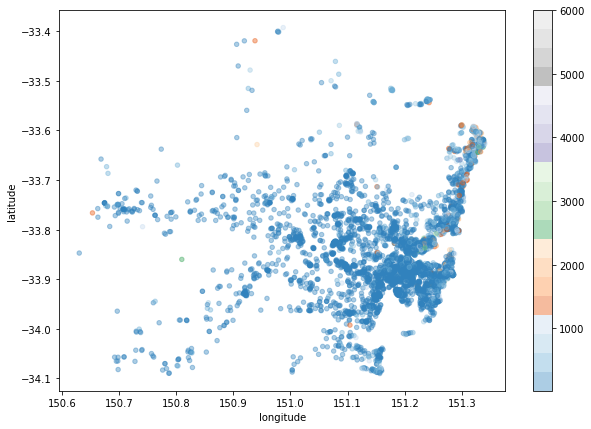

In [22]:
# By plotting the lattitude and longitude, we can determine the geography of NSW. 
# From this we are able to point out sydney regions like eastern suburbs into central sydney, northern beaches and the 
#inner west. It is apparent that most listings have prices on the lower end, from 0 to 1000, some outliers are observed
#as orange dots on the map

df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c=df_train["price"].astype(float), cmap="tab20c", colorbar=True, sharex=False);

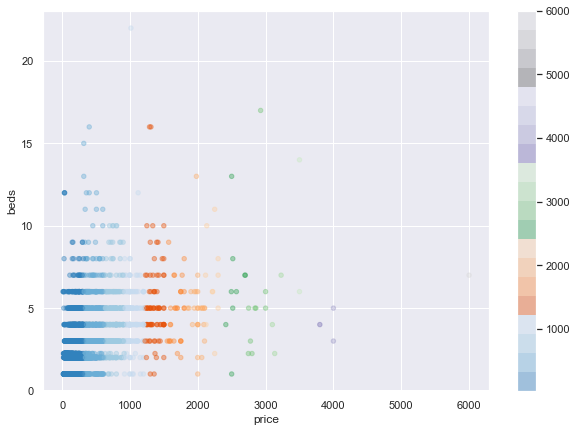

In [38]:
# Scatterplot of price to beds suggest that having any more then 5 beds does not necessarily suggest a higher price.

df_train.plot(kind="scatter", x="price", y="beds", alpha=0.4, figsize=(10,7), c=df_train["price"].astype(float), cmap="tab20c", colorbar=True, sharex=False);

In [24]:
# Creating Median Price column for each neighbourhood_cleansed. Therefore, each neighbourhood has a unique median price.

#Iterate through the dataframe with a nested loop to match up the host_cleansed from df_train to new_2 and then transfer the median price (which is saved in 'new_2') back into df_train
#Essentially exporting one thing from one dataframe to another based on a shared column
#Exporting median price from new_2 to df_train by equating the neighbourhood_cleansed column


df_train['Median Price'] = df_train.groupby(['neighbourhood_cleansed'])['price'].transform(lambda x: x.median())
df_train.head()
new = df_train.filter(['neighbourhood_cleansed','Median Price'], axis=1)
new.groupby('neighbourhood_cleansed')['Median Price'].apply(list)
new_2 = new.groupby('neighbourhood_cleansed')['Median Price'].apply(list).reset_index(name='Median Price')
new_2["empty"] = " "

for x in new_2['Median Price'].index:
    new_2.iloc[x,2] = new_2.iloc[x,1][0]

new_2 = new_2.filter(['neighbourhood_cleansed','empty'])
new_2.rename(columns = {'empty' : 'Median Price'}, inplace=True)

df_train["Median Price"] = " "

for x in df_train.index:
    for y in new_2.index:
        if df_train.iloc[x,7] == new_2.iloc[y,0]:
            df_train.iloc[x, 1227] = new_2.iloc[y,1]
        else:
            continue
            
df_test["Median Price"] = " "

for x in df_test.index:
    for y in new_2.index:
        if df_test.iloc[x,7] == new_2.iloc[y,0]:
            df_test.iloc[x, 517] = new_2.iloc[y,1]
        else:
            continue

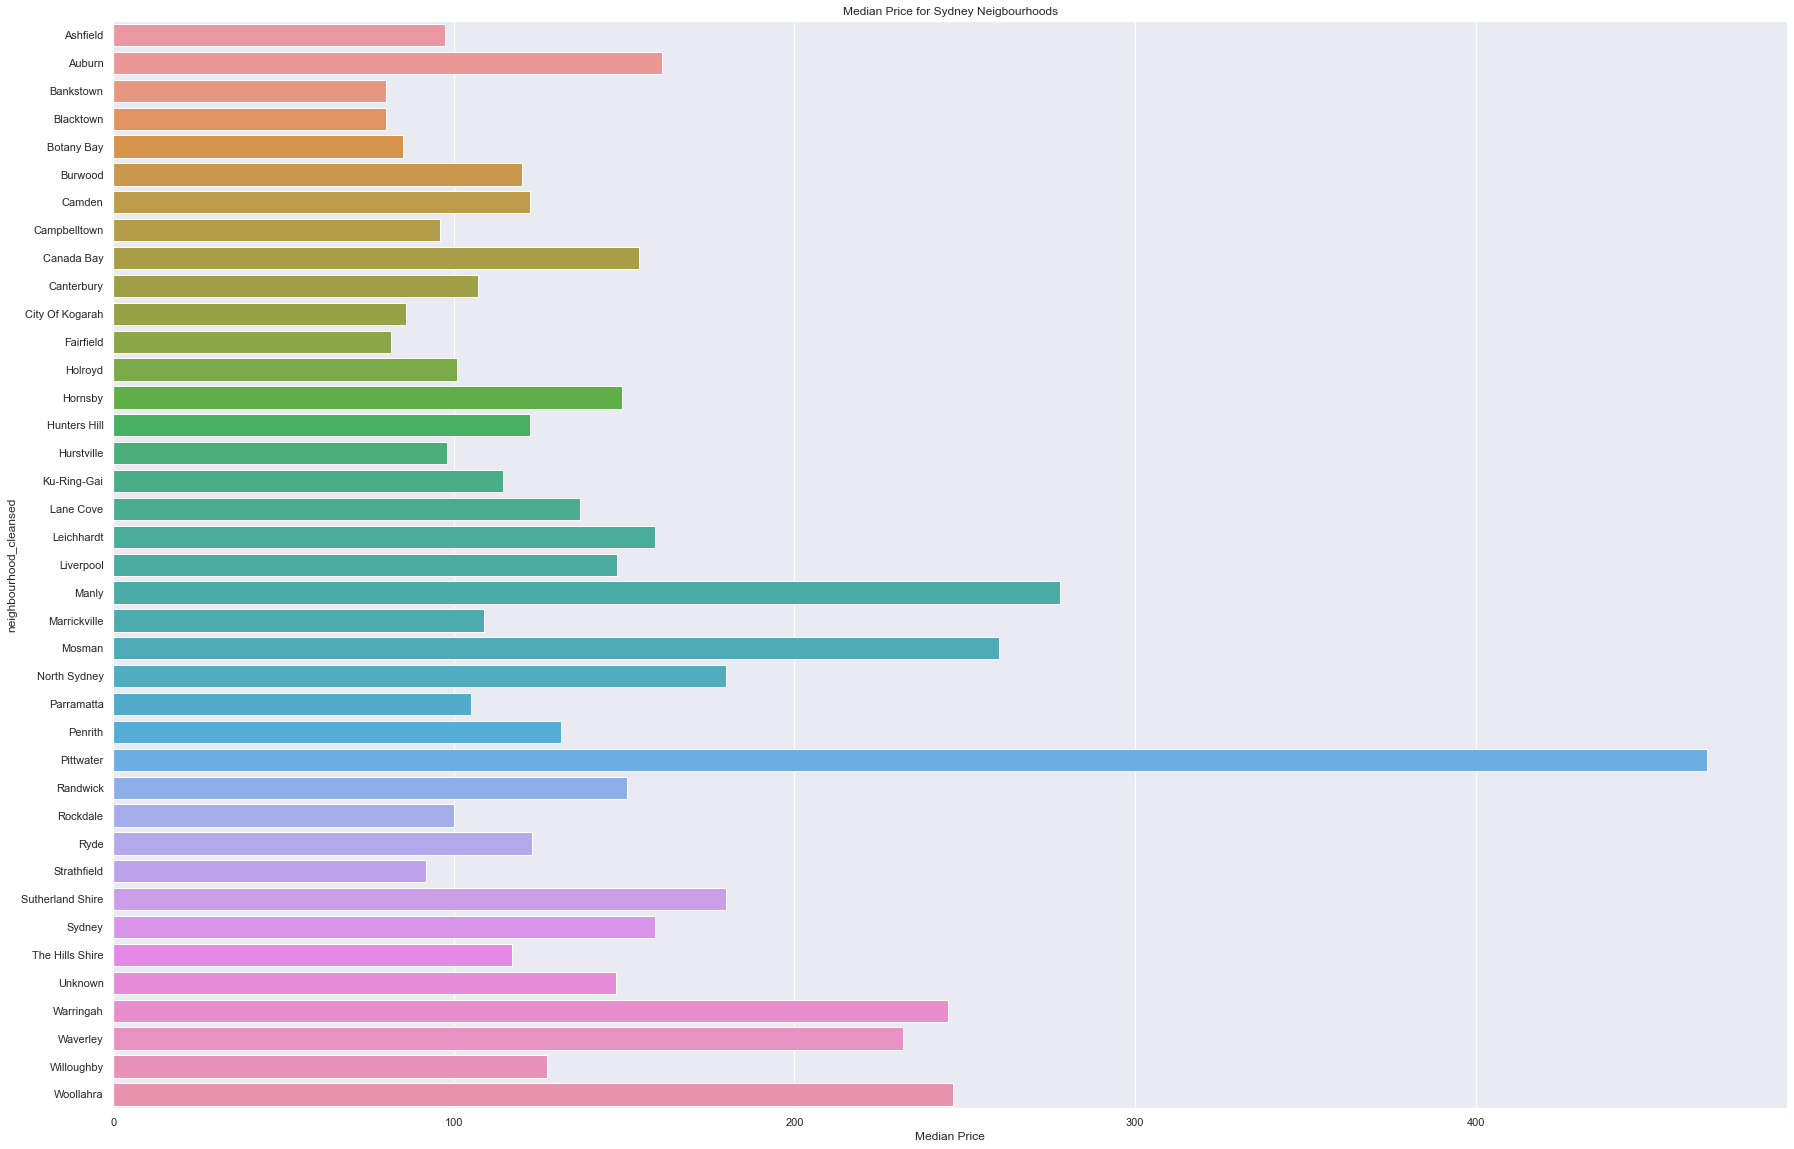

In [44]:
# Using the median prices per neighbourhood calculated above, we can plot and compare these prices.
# It is apparent that Pittwater has the highest median price which is close to $500. 
# Similarly, Marrickville and Mosman have the second and third highest median prices.
# Alternatively, more of the western and southern neigbourhoods like Blacktown, 
# Fairfield and Bankstown have the lowest median prices.

sns.barplot(x="Median Price", y="neighbourhood_cleansed", data=new_2).set(title='Median Price for Sydney Neigbourhoods')
sns.set(rc={'figure.figsize':(30,20)})

<AxesSubplot:title={'center':'\nMedian Price by Number of Beds\n\n'}, xlabel='None-beds', ylabel='Median Price'>

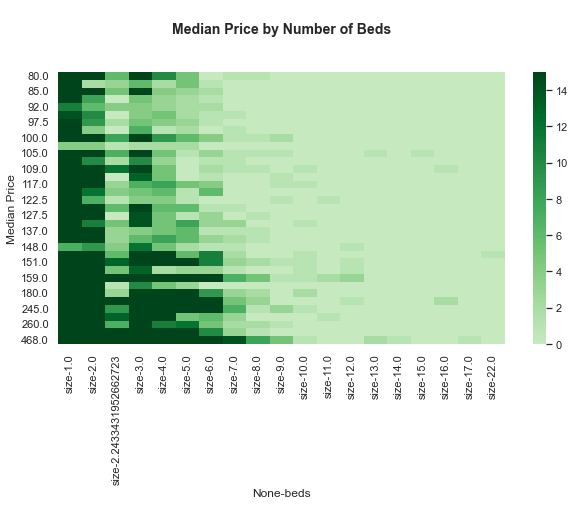

In [40]:
# The heatmap below shows the median price compared to the number of beds at an AirBnB
# WE can observe a high amount of prices relating to the number of beds at the left side of the graph
# Moving further right, as price increases the number of beds also increase. Darker shades of green indicate more beds.
# Some outliers exist in the heatmap, but do not impact the heatmap greatly.

new4 = df_train.filter(['Median Price', 'beds'], axis = 1)
new_4 = new4.groupby(['Median Price','beds'], as_index = False).size()
new_4_pivot = new_4.pivot('Median Price', ['beds']).fillna(0)
new_4 = (new_4_pivot - new_4_pivot.mean())/new_4_pivot.std()
sns.set(rc={'figure.figsize':(10,5)}) 
plt.xlabel('\nNumber of Beds', fontsize=12)
plt.ylabel('Median Price\n', fontsize=12)
plt.title('\nMedian Price by Number of Beds\n\n', fontsize=14, fontweight='bold');
sns.heatmap(new_4_pivot, vmin = 0, vmax = 15, center = 5, cmap = 'Greens')

<AxesSubplot:title={'center':'\nCorreclated Heatmap of all numerical columns\n\n'}>

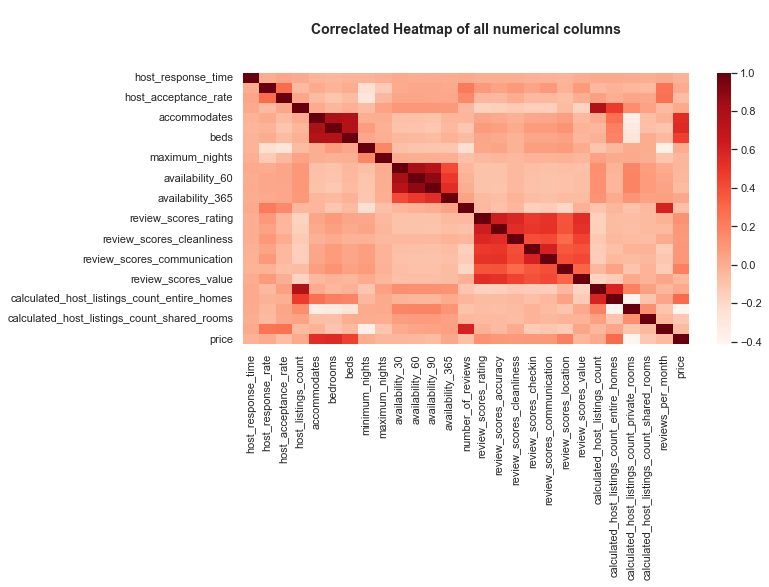

In [41]:
# Below is a correlated heatmap of all numerical values in the df_train dataset. a diagonal downwards trend exists to show a 1:1
# correlation. Darker shades of red indicate high correlations, such as reviews_scores_value correlates highly with host_listings_count
# Price has a high positive correlation with accommodates, beds, and review_scores_value.
df_train = df_train.astype({"price": float})
x1 = df_train[['host_response_time', 'host_response_rate', 'host_acceptance_rate','host_listings_count','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month','price','bathrooms']].corr(method='kendall')
plt.title('\nCorreclated Heatmap of all numerical columns\n\n', fontsize=14, fontweight='bold');
sns.heatmap(x1, cmap = 'Reds')

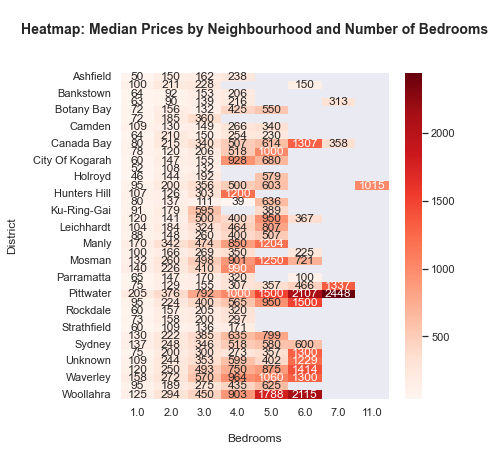

In [42]:
# The heatmap below shows the median price by neighbourhood for the number of bedrooms.
# We can observe a higher median price for Pittwater and Woollahra as the number of bedrooms increase.

plt.figure(figsize=(6,6))
sns.heatmap(df_train.groupby(['neighbourhood_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")
plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

In [29]:
# Cleaned version to be used in models which includes the extensive list of amenities. There are also several other columns like median price at the very end.
df_train.head()

,ID,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,amenities_count,host_verifications_count,Quality products body soap,1 wok burner. stainless steel stove,130\ HDTV with Chromecast,2 Door-Compact under bench size refrigerator,2 burner electric electric stove,2-5 years old,20\ TV,21\ TV,22\ TV with standard cable,24\ HDTV with Apple TV,24\ TV,3/4 Fischer refrigerator,30\ TV,32\ HDTV,32\ HDTV with Chromecast,32\ HDTV with Netflix,32\ HDTV with premium cable,32\ HDTV with standard cable,32\ TV,32\ TV with Roku,36\ HDTV,37\ TV,39\ HDTV,39\ TV with Netflix,400L refrigerator,40\ HDTV,40\ HDTV with Chromecast,40\ HDTV with Netflix,40\ TV,40\ TV with Netflix,41\ HDTV,42\ HDTV,42\ HDTV with Apple TV,42\ HDTV with Chromecast,42\ HDTV with Netflix,42\ HDTV with standard cable,42\ TV,43\ HDTV,43\ HDTV with Amazon Prime Video,43\ HDTV with Netflix,43\ HDTV with standard cable,44\ HDTV,45\ HDTV with Chromecast,45\ HDTV with Netflix,46\ HDTV with Netflix,46\ HDTV with premium cable,46\ HDTV with standard cable,46\ TV with Apple TV,47\ HDTV with Netflix,49\ HDTV,49\ HDTV with Netflix,49\ TV with Amazon Prime Video,5 burner induction cooktop stove,5-10 years old,50\ HDTV,50\ HDTV with Amazon Prime Video,50\ HDTV with Apple TV,50\ HDTV with Chromecast,50\ HDTV with Netflix,50\ HDTV with standard cable,50\ TV,50\ TV with Netflix,50\ TV with standard cable,55\ HDTV,55\ HDTV with Amazon Prime Video,55\ HDTV with Apple TV,55\ HDTV with Chromecast,55\ HDTV with Netflix,55\ HDTV with premium cable,55\ HDTV with standard cable,55\ TV,55\ TV with Netflix,55\ TV with standard cable,57\ HDTV with Netflix,58\ HDTV with Netflix,60\ HDTV,60\ HDTV with Amazon Prime Video,60\ HDTV with Apple TV,60\ HDTV with Chromecast,60\ HDTV with Netflix,60\ HDTV with standard cable,60\ TV with Amazon Prime Video,60\ TV with Netflix,60\ TV with standard cable,64\ HDTV with Apple TV,65\ HDTV,65\ HDTV with Amazon Prime Video,65\ HDTV with Apple TV,65\ HDTV with Chromecast,65\ HDTV with Netflix,65\ HDTV with standard cable,65\ TV with Amazon Prime Video,65\ TV with Netflix,68\ HDTV with Amazon Prime Video,70\ HDTV with Apple TV,70\ HDTV with Chromecast,70\ HDTV with Netflix,70\ TV with Netflix,75\ HDTV,75\ HDTV with Amazon Prime Video,75\ HDTV with Netflix,AEG oven,AESOP body soap,AESOP conditioner,AESOP shampoo,AESOPS body soap,ARtus stainless steel stove,ASPAR botanically active products created with care and expertise by therapists at our award-winning Aurora spas. body soap,ASPAR botanically active products created with care and expertise by therapists at our award-winning Aurora spas. conditioner,ASPAR botanically active products created with care and expertise by therapists at our award-winning Aurora spas. shampoo,Aesop body soap,Aesop conditioner,Aesop shampoo,Aesops conditioner,Aesops shampoo,Air Fryer /oven. Mistral living Essential oven,Air conditioning,Air fryer oven,Air-Fryer oven,Akai sound system with Bluetooth and aux,Alexa sound system,Alexa sound system with Bluetooth and aux,Amazon Prime Video,Ancient Earth body soap,Ancient Earth conditioner,Ancient Earth shampoo,Appelle conditioner,Appelle shampoo,Apple TV,Arbonne body soap,Artusi refrigerator,Ashley & Co. body soap,Ashley &

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same MSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 11

In [30]:
# Import libraries which are used for model building. These includes the models themselves, pipeline, metrics and hypertuning libraries
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score

# Importing of booster model
import xgboost as xgb
from xgboost import XGBRegressor



# Create a dataframe containing all the predictors which we believe will have a significant impact on the model. This is done for the training and testing dataset.
X_train = df_train[['availability_30','availability_60','number_of_reviews','beds','bedrooms','accommodates','description','no_description', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'SuperHost_True', 'SuperHost_False','instant_bookable_True','instant_bookable_False','has host_about','Median Price', 'SuperHost_False', 'SuperHost_True', 'Profile_Pic_False', 'Profile_Pic_True', 'Host_Verification_False', 'Host_Verification_True', 'has_availability_False', 'has_availability_True', 'instant_bookable_True', 'no_description', 'description', 'no_N_overview', 'has N_overview', 'no_host_about', 'has host_about', 'Entire Home_room', 'Hotel Room_Type', 'Private Room_Type', 'Shared Room_Type','no_host_about','has N_overview','no_N_overview', 'amenities_count','Pool','Hot tub','Wifi','reviews']]
X_test = df_test[['availability_30','availability_60','number_of_reviews','beds','bedrooms','accommodates','description','no_description', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'SuperHost_True', 'SuperHost_False','instant_bookable_True','instant_bookable_False','has host_about','Median Price', 'SuperHost_False', 'SuperHost_True', 'Profile_Pic_False', 'Profile_Pic_True', 'Host_Verification_False', 'Host_Verification_True', 'has_availability_False', 'has_availability_True', 'instant_bookable_True', 'no_description', 'description', 'no_N_overview', 'has N_overview', 'no_host_about', 'has host_about', 'Entire Home_room', 'Hotel Room_Type', 'Private Room_Type', 'Shared Room_Type','no_host_about','has N_overview','no_N_overview','amenities_count','Pool','Hot tub','Wifi','reviews']]

In [31]:
# Scaling of X_train and X_test incase of use.
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [32]:
# Creating a pipeline which includes base regressor models, as well as booster models.


# Linear Regression
pipeline_lr=Pipeline([("mode1", StandardScaler()),
                     ("lr",LinearRegression())])
# Lasso Regression
pipeline_lasso=Pipeline([("mode2", RobustScaler()),
                      ("lasso",Lasso())])
# Decision Tree 
pipeline_dt=Pipeline([("mode3", StandardScaler()),
                     ("dt",DecisionTreeRegressor())])
# Random Forest
pipeline_rf=Pipeline([("mode4", StandardScaler()),
                     ("rf",RandomForestRegressor())])
# Ridge
pipeline_Rg=Pipeline([("Scaler5", StandardScaler()), 
                     ("Ridge", Ridge())])
# GradientBoostingRegressor
pipeline_GB=Pipeline([("Scaler7", StandardScaler()), 
                     ("Gradient", GradientBoostingRegressor())])
# ElasticNet
pipeline_EN=Pipeline([("Scaler8", RobustScaler()), 
                     ("Elastic", ElasticNet())])
# SVR
pipeline_SVM=Pipeline([("Scaler9", StandardScaler()), 
                     ("Support", SVR())])

# XGBRegressor
pipe_XGB  = Pipeline(
    steps = [ ('XGB', XGBRegressor(random_state=5)) ])

# ADA
pipe_ADA = Pipeline(
    steps= [('ADA', AdaBoostRegressor(random_state=5)) ])




# List of all the pipelines. Split up between base and additions as the require different paramters.
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_Rg, pipeline_GB, pipeline_EN, pipeline_SVM]
pipelines_addition = [pipe_XGB, pipe_ADA]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForestRegressor", 4: "Ridge", 5: "GradientBoostingRegressor", 6: "ElasticNet", 7: "SVR"}
pipeline_dict1 = {0: "XGBRegressor", 1:  'AdaBoostRegressor'}




# Fit the models in the pipeline to the training data
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for pipe in pipelines_addition:
    pipe.fit(X_train.values, y_train)
    
    
    
# Calculation and printing of evaluation criterias. 
print('MSE')
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error")
    cv_score_use = (cv_score)**2
    cv_results_rms.append(cv_score_use)
    print("%s: %f " % (pipeline_dict[i], cv_score_use.mean()))
    
    
cv_results_rms1 = []
for i, model1 in enumerate(pipelines_addition):
    cv_score = cross_val_score(model1, X_train.values, y_train, scoring="neg_root_mean_squared_error")
    cv_score_use = (cv_score)**2
    cv_results_rms.append(cv_score_use)
    print("%s: %f " % (pipeline_dict1[i], cv_score_use.mean()))

MSE
LinearRegression: 54800.957764 
Lasso: 53368.618371 
DecisionTree: 82659.879714 
RandomForestRegressor: 43220.003937 
Ridge: 53731.251439 
GradientBoostingRegressor: 41401.673925 
ElasticNet: 56682.308741 
SVR: 100978.689385 
XGBRegressor: 42449.766587 
AdaBoostRegressor: 243594.510207 


In [33]:
# We have decided to move forward with the normal gradient boosting ensemble method
# This is due to the above preliminary analysis which suggests this model has the lowest error without using hypertuning in comparison to other models.

# Parameters for Gridsearch tuning
regressor = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [50, 100, 150, 250, 500],
              'min_samples_split': [2, 4],
              'random_state': [2],
              }

# Gridsearch Method
model_grid = GridSearchCV(regressor,
                          param_grid=parameters,
                          scoring= "neg_mean_squared_error",
                          cv=8,
                          n_jobs=-1,
                          verbose=0)

# Application of gridsearch to dataset
model_grid.fit(X_train.values, y_train)


# Creation of evaluation metric - MSE - multiplied by -1 as the output is negative.\
# Finds the best score (MSE) based on the above trained model
mean_squared_error = (-1) * model_grid.best_score_
mse = mean_squared_error
print ('Gradient Boost MSE: ', mse)


# Application of best estimator to the training data - has to be fit first before you can calculate the best_estimator
# Gives info regarding the paramter that resulted in the above best score - this is then reapplied so that the data is fit to the "Best" Model.
best_model = model_grid.best_estimator_ 
model = best_model.fit(X_train.values, y_train)

Gradient Boost MSE:  41132.02909349959


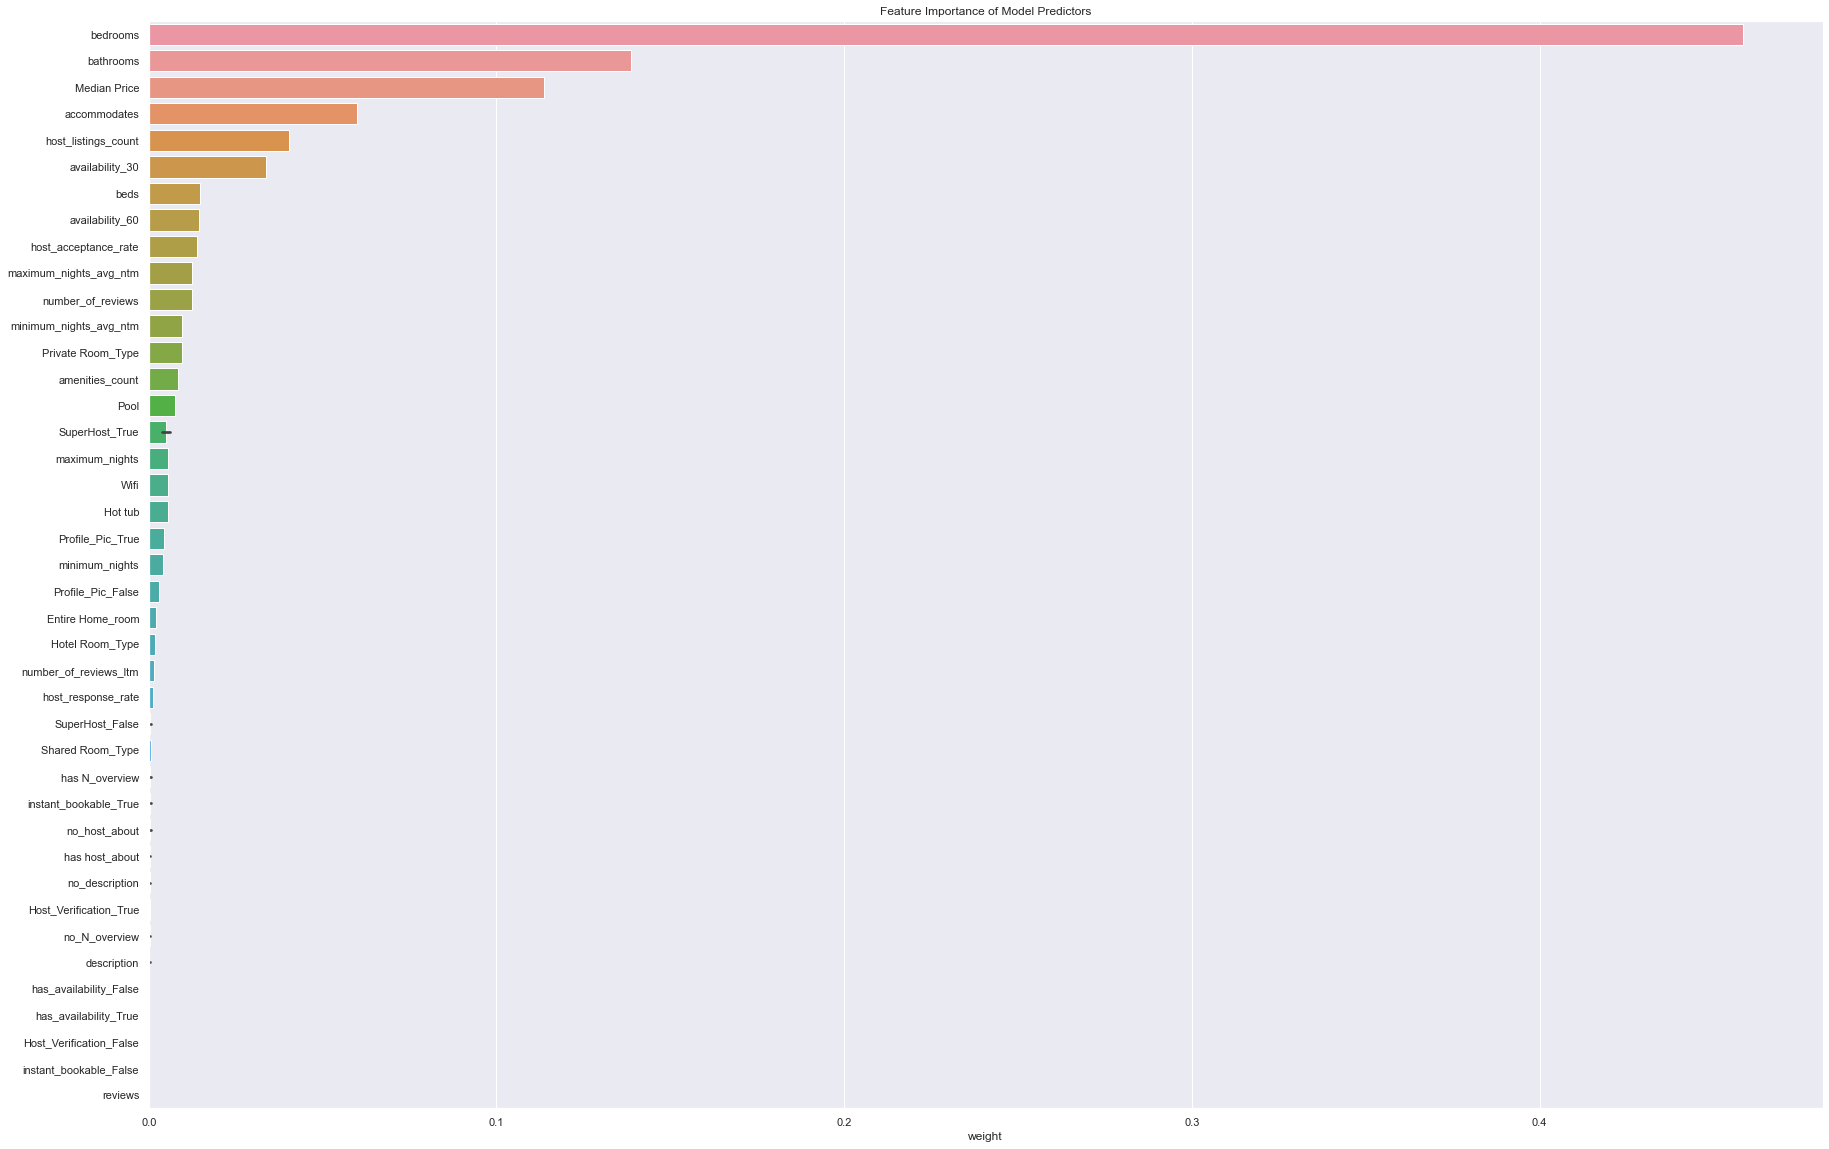

In [46]:
# Feature importance graph suggests median price, bedrooms, bathrooms and accomodates are most important in this model.

# Calculations of weights for feature importance graph
feature_scores = pd.DataFrame(model.feature_importances_, index = X_train.columns)
feature_scores.rename(columns = {0 : "Number"}, inplace = True)
feature_scores['weight'] = feature_scores['Number']/feature_scores['Number'].sum()
feature_scores.sort_values(by = 'weight',inplace = True, ascending = False)

# Barplot
sns.barplot(x = "weight", y=feature_scores.index, data=feature_scores).set(title='Feature Importance of Model Predictors')
sns.set(rc={'figure.figsize':(40,40)}) 

In [47]:
# Prediction of X_test based on hypertuned LightGradientBoosting model.
# Prediction of X_train to see train metrics

price = model.predict(X_test.values)
price_train = model.predict(X_train.values)

# Printing out ID and price column respectively in a excel document.
df_pred = pd.DataFrame(price, index=df_test['ID'], columns=['price'])
df_pred
file_name = 'Final_Submission_test'

#saving the predictions as a excel document
df_pred.to_csv(file_name)

In [36]:
# R-Squared of the training data
# Although this doesnt necessarily showcase the success of our model on out-of-sample data, it still suggests that it describes the current data well
R2_train= r2_score(y_train, price_train)
print('R2:', R2_train*100,'%')

R2: 83.21803399410777 %


In [45]:
# Screenshot of rankings as of 2/6/2022 - 4:30pm
# Our group "FreshFoodPeople" scored an average squared error of 169803.61, which suggests that on average, the actual Airbnb listing is +/- this value.
# We had a far larger number of submissions compared to most other groups with 260. Our score remained relatively competitive, with at the time being ranked 5th.